In [8]:
from uncertainties import unumpy, ufloat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%ls

 Volume in drive C has no label.
 Volume Serial Number is A4AD-16E2

 Directory of C:\Users\William Morse\ilikepie\ILab2\magForce\Data validation

05/12/2016  08:25 PM    <DIR>          .
05/12/2016  08:25 PM    <DIR>          ..
04/10/2016  02:45 PM    <DIR>          .ipynb_checkpoints
03/17/2016  06:38 PM               578 helmFieldY.txt
05/12/2016  07:59 PM           215,147 Helmholtz coil data troubleshooting.ipynb
05/12/2016  07:57 PM           387,950 helmholtzPlot.png
03/17/2016  06:40 PM               564 quadFieldY.txt
04/10/2016  01:33 PM               411 radial_field.txt
05/12/2016  08:25 PM            13,163 Unumpy testing.ipynb
               6 File(s)        617,813 bytes
               3 Dir(s)  32,538,206,208 bytes free


In [9]:
data = np.genfromtxt('radial_field.txt', delimiter=', ', skip_header=True)
#print(data)

uncertin_array = unumpy.uarray(data[:,0], 0.01)
print(uncertin_array)

[0.0+/-0.01 0.25+/-0.01 0.53+/-0.01 0.7+/-0.01 1.08+/-0.01 1.25+/-0.01
 1.55+/-0.01 1.74+/-0.01 2.06+/-0.01 2.26+/-0.01 2.52+/-0.01 2.77+/-0.01
 3.05+/-0.01 0.0+/-0.01 -3.05+/-0.01 -0.25+/-0.01 -2.75+/-0.01 -0.5+/-0.01
 -2.5+/-0.01 -0.75+/-0.01 -2.25+/-0.01 -1.0+/-0.01 -2.0+/-0.01 -1.25+/-0.01
 -1.75+/-0.01 -1.5+/-0.01 -3.05+/-0.01]


In [10]:
def errorbarrplot(xuarray, yuarray, marker='.'):
    
    xdataarray = []
    xerrorarray = []
    ydataarray = []
    yerrorarray = []
    
    for i in xuarray:
        xdataarray.append(i.s)
        xerrorarray.append(i.n)
        
    for i in yuarray:
        ydataarray.append(i.s)
        yerrorarray.append(i.n)
        
    return(plt.errorbar(xdataarray, yerrorarray, xerrorarray, yerrorarray, marker=marker))

In [11]:
print(np.pi)

3.141592653589793


In [12]:
k = ufloat(1.16, 0.07)
x = ufloat(.010, 0.0005)

print(k*x)

0.0116+/-0.0009


[-2.         -1.78947368 -1.57894737 -1.36842105 -1.15789474 -0.94736842
 -0.73684211 -0.52631579 -0.31578947 -0.10526316  0.10526316  0.31578947
  0.52631579  0.73684211  0.94736842  1.15789474  1.36842105  1.57894737
  1.78947368  2.        ]
[-2.0+/-0.123, -1.7894736842105263+/-0.123, -1.5789473684210527+/-0.123, -1.368421052631579+/-0.123, -1.1578947368421053+/-0.123, -0.9473684210526316+/-0.123, -0.736842105263158+/-0.123, -0.5263157894736843+/-0.123, -0.3157894736842106+/-0.123, -0.10526315789473695+/-0.123, 0.10526315789473673+/-0.123, 0.3157894736842106+/-0.123, 0.5263157894736841+/-0.123, 0.7368421052631575+/-0.123, 0.9473684210526314+/-0.123, 1.1578947368421053+/-0.123, 1.3684210526315788+/-0.123, 1.5789473684210522+/-0.123, 1.789473684210526+/-0.123, 2.0+/-0.123]


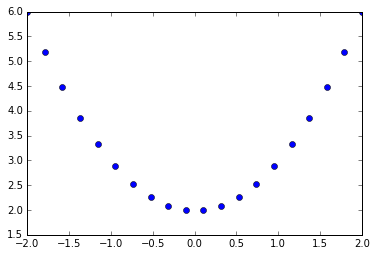

In [24]:
# make a plot that respects theoretical models. a continous error plot of sorts
# we are going to use a single coil field as our model to create the plot

y = np.linspace(-2, 2, 20)
k = []
for i in y: k.append(ufloat(i ,.123))
print(y)
print(k)
x = []
for i in y:
    x.append(i**2 + 1.98788)
    
plt.plot(unumpy.nominal_values(k), x, 'o')
plt.show()

# transform the numpy array and python list into ufloat arrays
y = unumpy.uarray(y, 0.1)
x = unumpy.uarray(x, 0.1)

# make an errorbarr plot